# PSET 4: Capacitance

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
csv_filename = '10uf_charge_2.csv'

csv = pd.read_csv(csv_filename)

In [4]:
res = 100 * (10 ** 3)  # ohm
cap = 10 * (10 ** -6)  # Farad

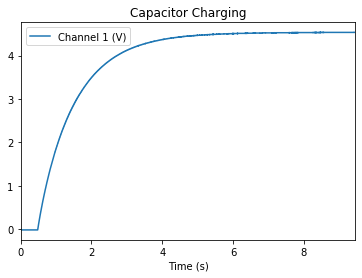

In [5]:
csv.plot('Time (s)', 'Channel 1 (V)', title='Capacitor Charging')

## Calculate theoretical charging curve


$$ V_{out} = V_\infty (1 - e^{{-t\over{\tau}}}) $$

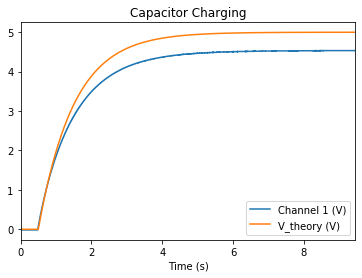

In [6]:
v_inf = 5  # V
tau = res * cap
t_0 = .5
v_theory = v_inf * (1 - np.exp(-1 * (csv['Time (s)'] - t_0) / tau))

for i in range(len(v_theory.values)):
    v_theory.values[i] = v_theory.values[i] if v_theory.values[i] > 0 else 0

csv['V_theory (V)'] = v_theory

csv.plot(x='Time (s)', y=['Channel 1 (V)', 'V_theory (V)'], title='Capacitor Charging')

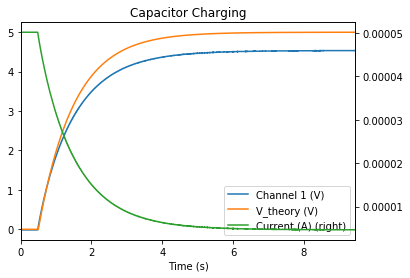

In [7]:
current = (5 - csv['Channel 1 (V)']) / res
csv['Current (A)'] = current


csv.plot(x='Time (s)', y=['Channel 1 (V)', 'V_theory (V)', 'Current (A)'], secondary_y=['Current (A)'], title='Capacitor Charging')
plt.savefig('cap_charge.png', dpi=100)